<a href="https://colab.research.google.com/github/eyvonne/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/Eyve_Geo_LS_DS7_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-08-12 21:56:04--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.133
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  96.5MB/s    in 2.0s    

2019-08-12 21:56:06 (96.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

Columns Needed/Location: 
- product ID/products.csv
- product name/products.csv
- product id with order/order products.

In [0]:
import pandas as pd
pd.options.display.max_rows=150

In [6]:
#read in and join up the orders information
df1=pd.read_csv('order_products__prior.csv')
df2=pd.read_csv('order_products__train.csv')
ordersDF=pd.concat([df1,df2])
ordersDF.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
#read in product name information 
products=pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
#create a dataframe of only the top ten items
topTen=ordersDF['product_id'].value_counts().head(10).index.tolist()
topTenDF=products[products['product_id'].isin(topTen)]
#remove any order lines that don't have a product in the top ten (make it go faster)
ordersSubset=ordersDF[ordersDF['product_id'].isin(topTen)]
topTenDF['product_id'].value_counts()

21903    1
16797    1
47766    1
47626    1
47209    1
13176    1
26209    1
27845    1
24852    1
21137    1
Name: product_id, dtype: int64

In [9]:
ordersSubset.head()

,order_id,product_id,add_to_cart_order,reordered
12,3,21903,4,1
30,5,13176,1,1
51,5,47209,22,0
77,10,24852,1,1
80,10,47766,4,1


In [10]:
topTenDF['product_id']

13175    13176
16796    16797
21136    21137
21902    21903
24851    24852
26208    26209
27844    27845
47208    47209
47625    47626
47765    47766
Name: product_id, dtype: int64

In [0]:
columns=['product_id','product_name']

merged=pd.merge(ordersSubset['product_id'], topTenDF[columns], how='inner', on='product_id')
merged.head()
topTenRate=merged['product_name'].value_counts()

In [12]:
#this is a list of the top ordered items and how often they were ordered 
topTenRate

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import numpy as np

In [14]:
#set up table 2 
table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
treat=table2.index.to_list()

In [16]:
cols=table2.columns.to_list()
cols

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
table2=table2.reset_index()

In [18]:
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [19]:
tidy=table2.melt(id_vars='index', value_vars=cols)
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
import seaborn as sns

In [0]:
flights = sns.load_dataset('flights')

In [0]:
##### YOUR CODE HERE #####

In [23]:
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [24]:
##### YOUR CODE HERE #####
#create a list of the most common items purchased 
values=ordersDF['product_id'].value_counts()
orderRate=values[values>29000]
orderRate=orderRate.reset_index()
orderRate=orderRate.rename(columns={'index':'product_id','product_id':'purchase_rate'})
orderRate.head()

,product_id,purchase_rate
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [25]:
#add the names of the products back in
orderRate=pd.merge(orderRate, products[columns])
orderRate

,product_id,purchase_rate,product_name
0,24852,491291,Banana
1,13176,394930,Bag of Organic Bananas
2,21137,275577,Organic Strawberries
3,21903,251705,Organic Baby Spinach
4,47209,220877,Organic Hass Avocado
5,47766,184224,Organic Avocado
6,47626,160792,Large Lemon
7,16797,149445,Strawberries
8,26209,146660,Limes
9,27845,142813,Organic Whole Milk


In [26]:
#this data has the times of orders 
orders=pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [27]:
#combine into one dataframe that has all the info we need in it 
orderCols=['order_id','order_hour_of_day']
idCols=['order_id','product_id']
timeOrderDF=pd.merge(orders[orderCols], ordersDF[idCols])
timeOrderDF
                            

,order_id,order_hour_of_day,product_id
0,2539329,8,196
1,2539329,8,14084
2,2539329,8,12427
3,2539329,8,26088
4,2539329,8,26405
5,2398795,7,196
6,2398795,7,10258
7,2398795,7,12427
8,2398795,7,13176
9,2398795,7,26088


In [0]:
final=pd.merge(timeOrderDF, orderRate[columns])

In [29]:
final.columns.to_list()

['order_id', 'order_hour_of_day', 'product_id', 'product_name']

In [30]:
ct=pd.crosstab(final['product_name'],final['order_hour_of_day'], normalize='index')
ct

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
product_name,,,,,,,,,,,,,,,,,,,,,,,,
100% Raw Coconut Water,0.008454,0.005042,0.003056,0.002063,0.001782,0.003208,0.008352,0.025464,0.049604,0.074151,0.078811,0.079804,0.075272,0.083064,0.083522,0.081638,0.078913,0.067785,0.055410,0.047338,0.032569,0.022485,0.018920,0.013292
100% Recycled Paper Towels,0.006885,0.005026,0.003098,0.001756,0.001893,0.002892,0.007643,0.027748,0.052914,0.073433,0.082315,0.080490,0.080215,0.080215,0.082039,0.078390,0.077461,0.068441,0.056288,0.043619,0.032947,0.023996,0.018384,0.011912
100% Whole Wheat Bread,0.005514,0.002820,0.001474,0.001236,0.001315,0.002424,0.010172,0.032592,0.059923,0.077146,0.082517,0.080695,0.077574,0.081028,0.082422,0.083943,0.079380,0.065802,0.050417,0.040086,0.029661,0.023608,0.018031,0.010220
2% Reduced Fat Milk,0.006549,0.003546,0.002718,0.002200,0.001683,0.003003,0.007869,0.026067,0.056121,0.083689,0.089281,0.086873,0.077710,0.076622,0.079030,0.079004,0.077373,0.068002,0.055914,0.042686,0.027983,0.020709,0.015273,0.010096
Apple Honeycrisp Organic,0.006314,0.002761,0.001730,0.001203,0.001375,0.003014,0.009637,0.031980,0.060306,0.080931,0.086500,0.082982,0.079991,0.081080,0.081790,0.081699,0.076634,0.059836,0.046762,0.036518,0.029070,0.024510,0.021748,0.011630
Asparagus,0.006999,0.003204,0.002080,0.001251,0.001405,0.002614,0.008391,0.028320,0.049838,0.069303,0.080856,0.082318,0.083934,0.086056,0.089500,0.086956,0.078875,0.067294,0.047589,0.036177,0.028545,0.024933,0.020759,0.012804
Bag of Organic Bananas,0.007184,0.003661,0.002127,0.001519,0.001590,0.002702,0.009414,0.030879,0.058150,0.079429,0.083719,0.081298,0.077530,0.079796,0.081306,0.081668,0.077247,0.062963,0.049690,0.039065,0.030603,0.025159,0.020393,0.012909
Banana,0.005933,0.002986,0.001765,0.001246,0.001451,0.002785,0.010061,0.030654,0.057898,0.080099,0.085965,0.081278,0.076663,0.078253,0.080972,0.080808,0.078060,0.065173,0.052340,0.039946,0.030739,0.024741,0.018812,0.011372
Bartlett Pears,0.006035,0.003250,0.002075,0.001120,0.001338,0.002840,0.009694,0.032032,0.065319,0.094129,0.092463,0.085827,0.074823,0.076352,0.078181,0.075642,0.073348,0.054397,0.043692,0.032687,0.030584,0.028809,0.022774,0.012589


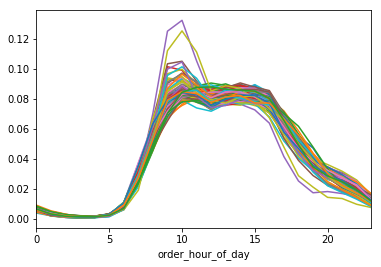

In [31]:
ct.T.plot(legend=False);

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####